In [ ]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import numpy as np

In [ ]:
#Enter dataset URL here
url = 'https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00254.htm'

In [ ]:
response = requests.get(url)

In [ ]:
soup = bs(response.content)

In [ ]:
Name = []
Party_Name = []
State = []
Vote = []

vote_summary = soup.find(class_ = 'newspaperDisplay_3column')
line = [j.split(',') for j in vote_summary.text.split('\n')]
line = line[1:-3]
for i in line:
    Name.append(i[0][:-7])
    Party_Name.append(i[0][-5])
    State.append(i[0][-3:-1])
    Vote.append(i[1][1:])

In [ ]:
df = pd.DataFrame(list(zip(Name,Party_Name,State,Vote)),columns = ['Name','Party_Name','State','Vote'])

In [ ]:
ans = {}

## Q1

In [ ]:
try :
    ans[1] = pd.crosstab(df.Party_Name,df.Vote).loc['D'].loc['Not Voting']
except:
    ans[1] = 0

In [ ]:
ans[1]

0

## Q2

In [ ]:
ans[2] = pd.crosstab(df.Party_Name,df.Vote).loc['R'].loc['Yea']

In [ ]:
ans[2]

23

## Q3

In [ ]:
ans[3] = df[(df.Name.apply(lambda x: True if x[0] == 'B' else False)) & (df.Vote == 'Yea')].shape[0]

In [ ]:
ans[3]

7

## Q4

In [ ]:
ans[4] = (df[df.Vote == 'Yea'].groupby(['State']).count()).query('Vote == 2').shape[0]

In [ ]:
ans[4]

32

## Q5 

In [ ]:
try :
    ans[5] = df[df.Vote == 'Not Voting'].groupby(['State']).count().shape[0]
except:
    ans[5] = 0

In [ ]:
ans[5]

2

## Q6

In [ ]:
ans[6] = (df[df.Party_Name == 'R'].groupby(['State']).count()).query('Party_Name == 2').shape[0]

In [ ]:
ans[6]

22

## Q7

In [ ]:
ans[7] = (pd.get_dummies(df,columns=['Party_Name']).groupby(['State']).sum()).query('Party_Name_R == 1 & Party_Name_D == 1').shape[0]

In [ ]:
ans[7]

5

## Q8

In [ ]:
ans[8] = df.Name.apply(lambda x : True if x[0] == 'W' else False).sum()

In [ ]:
ans[8]

6

## Q9

In [ ]:
major_decision = pd.crosstab(df['Party_Name'],df['Vote']).max(axis = 1).loc[['D','R']].values

In [ ]:
ans[9] = round(major_decision[0] / major_decision[1],4)

In [ ]:
ans[9]

2.0

## Q10

In [ ]:
nayyea = pd.crosstab(df['Party_Name'],df['Vote']).astype(float)
ph = abs(nayyea.Yea - nayyea.Nay)/(nayyea.Yea + nayyea.Nay)

In [ ]:
maximum = 0
for i in ph:
    if i not in [np.nan,np.infty] and i > maximum:
        maximum = i
        
ans[10] = str(round(maximum,4)*100) + '%'

In [ ]:
ans[10]

'100.0%'

## Q11

In [ ]:
ans[11] = pd.crosstab(df['Party_Name'],df['Vote']).loc['D'].loc['Yea']

In [ ]:
ans[11]

48

## Q12

In [ ]:
ans[12] = (df[df.Vote == 'Nay'].groupby(['State']).count()).query('Vote == 2').shape[0]
ans[12]

7

## Q13

In [ ]:
ans[13] = (pd.get_dummies(df,columns=['Party_Name']).groupby(['State']).sum()).query('Party_Name_D == 2').shape[0]
ans[13]

21

## Q14

In [ ]:
ans[14] = df[df.Vote == 'Not Voting'].shape[0]
ans[14]

3

## Q15

In [ ]:
ans[15] = df[df.Vote == 'Not Voting'].groupby(['State']).count().shape[0]
ans[15]

2

## Q16

In [ ]:
ans[16] = df.shape[0]/df.shape[1]
ans[16]

25.0

In [ ]:
import csv
import os

answers = []
for i in range(1,17):
    answers.append(['Q'+str(i),ans[i]])
        
import os
os.curdir
if not os.path.exists('tdsproject'):
    os.makedirs('tdsproject')
os.chdir('tdsproject')
filename = "TDS PROJECT.csv"

with open(filename, 'w',newline='') as csvfile:  
    csvwriter = csv.writer(csvfile,dialect='excel') 
    csvwriter.writerows(answers)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 17
import seaborn as sns
sns.set_style('whitegrid')


In [ ]:
ct = pd.crosstab(df.Party_Name,df.Vote)

## Q17

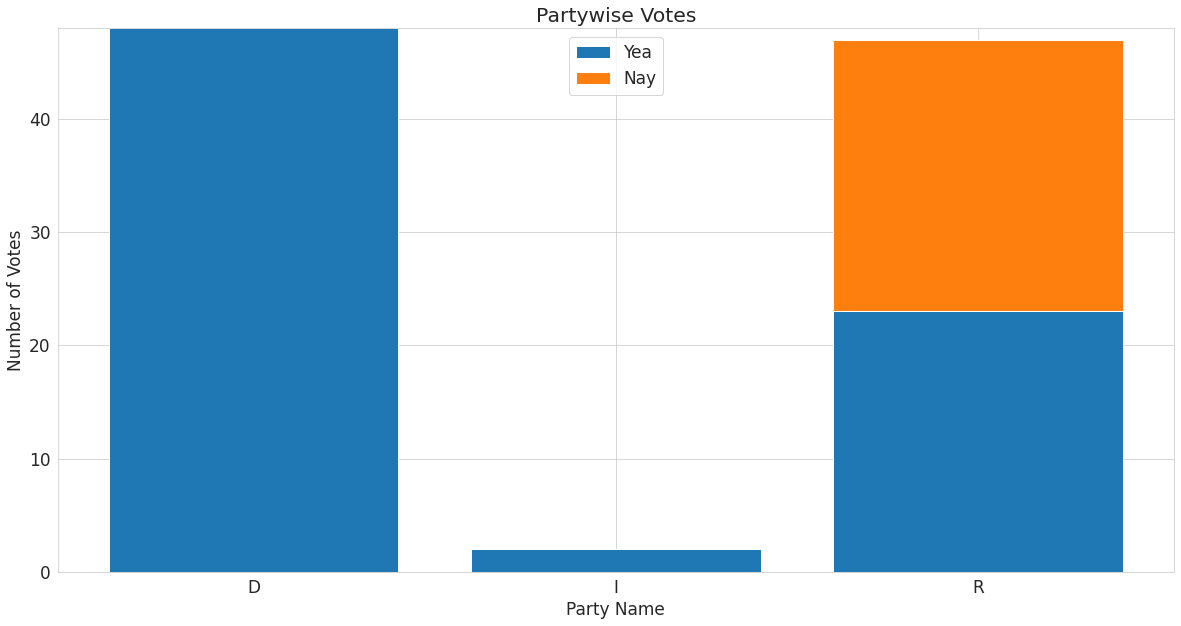

In [ ]:
plt.figure(figsize = (20,10))
y1 = ct.Yea
y2 = ct.Nay
try:
    y3 = ct['Not Voting']
except:
    pass
plt.bar(ct.index,y1,label = 'Yea')
plt.bar(ct.index,y2,bottom = y1,label = 'Nay')
'''try:
    plt.bar(ct.index,y3,bottom = y1+y2,label = 'Not Voting')
except:
    pass'''
plt.legend()
plt.xlabel('Party Name')
plt.ylabel('Number of Votes')
plt.title('Partywise Votes')

plt.savefig('Q17')

## Q18

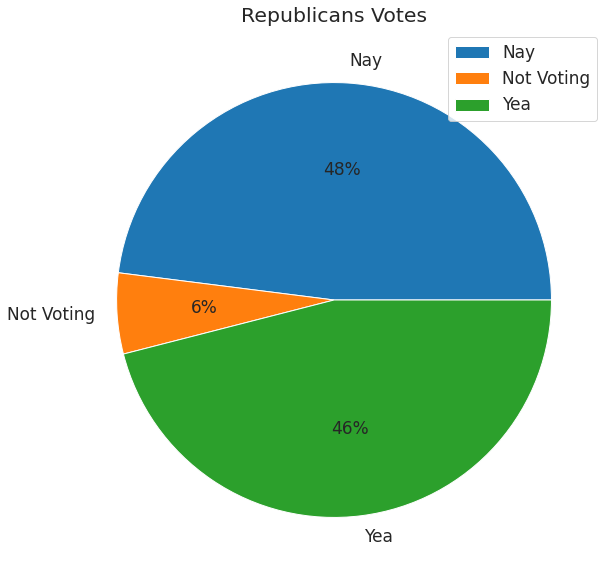

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(ct.loc['R'],autopct='%.0f%%',labels=ct.columns)
plt.legend(fontsize = 17)
plt.title('Republicans Votes')
plt.savefig('Q18')

## Q19

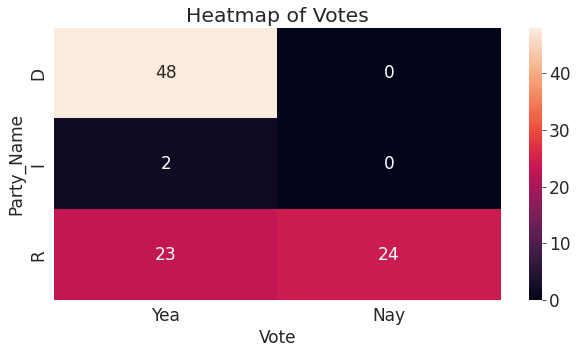

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(ct.loc[:,['Yea','Nay']],annot=True)
plt.title('Heatmap of Votes')
plt.savefig('Q19')

## Q20

In [ ]:
dom = pd.get_dummies(df,columns=['Party_Name']).groupby(['State']).sum()

In [ ]:
rm = dom[dom.Party_Name_R == 2].shape[0]
dm = dom[dom.Party_Name_D == 2].shape[0]
eq = dom[dom.Party_Name_D == dom.Party_Name_R].shape[0]

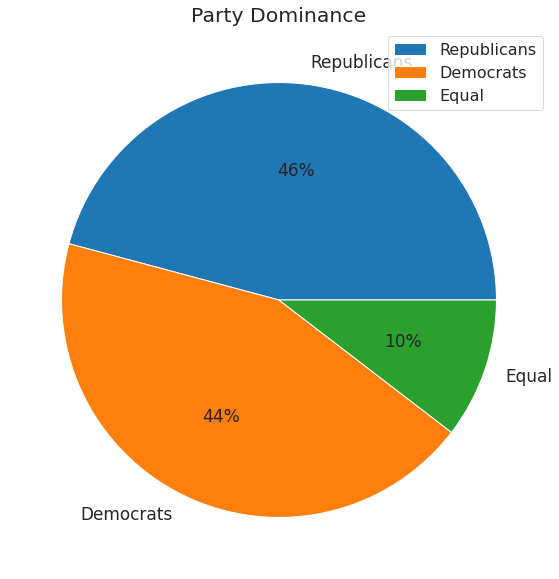

In [ ]:
plt.figure(figsize = (10,10))
plt.pie([rm,dm,eq],autopct='%.0f%%',labels=['Republicans','Democrats','Equal'])
plt.legend(fontsize = 16)
plt.title('Party Dominance')
plt.savefig('Q20')

In [ ]:
exit()